In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max.rows',None)
pd.set_option('display.max.columns',None)

In [3]:
os.getcwd()

'C:\\Users\\Abhi'

In [4]:
os.chdir('C:\\Users\\Abhi\\documents\\readings')

In [5]:
df =pd.read_csv('loan_approval_dataset.csv')

In [6]:
df.shape

(4269, 13)

In [7]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:
df.duplicated(keep=False).sum()

0

In [9]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [10]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [11]:
df[' residential_assets_value']=df[' residential_assets_value'].abs()
(df[' residential_assets_value']<0).sum()

0

In [12]:
#To trim extra spaces.
df.columns = df.columns.str.strip()

In [13]:
def cibil_rate(value):
    if 300<= value <=549:
        return 'poor'
    elif 550<= value <=699:
        return 'good'
    elif 700<= value <=850:
        return 'very good'
    elif 851<= value <=864:
        return 'excellent'
    else :
        'unknown'
# Apply the function to create a new column
df['cibil_range']=df['cibil_score'].apply(cibil_rate)
df.shape

(4269, 14)

In [14]:
def income_value(value):
    if 3000000<= value <=5490000:
        return 'low'
    elif 5500000<= value <=6990000:
        return 'moderate'
    elif 7000000<= value <=8400000:
        return 'high'
    elif 8500000<= value <=9000000:
        return 'very high'
    else :
        'unknown'
# Apply the function to create a new column
df['income_range']=df['income_annum'].apply(income_value)
df.shape

(4269, 15)

In [15]:
def dependents(value):
    if 0<= value <=1:
        return 'low'
    elif 2<= value <=3:
        return 'moderate'
    elif 4<= value <=5:
        return 'high'
    else :
         return 'unknown'
# Apply the function to create a new column
df['dependency']=df['no_of_dependents'].apply(dependents)
df.shape

(4269, 16)

# EDA

In [16]:
income =df['income_range'].value_counts().reset_index()
income.rename(columns={'income_range':'income_levels','count':'total'},inplace=True)
income

,income_levels,total
0,low,1118
1,high,685
2,moderate,641
3,very high,255


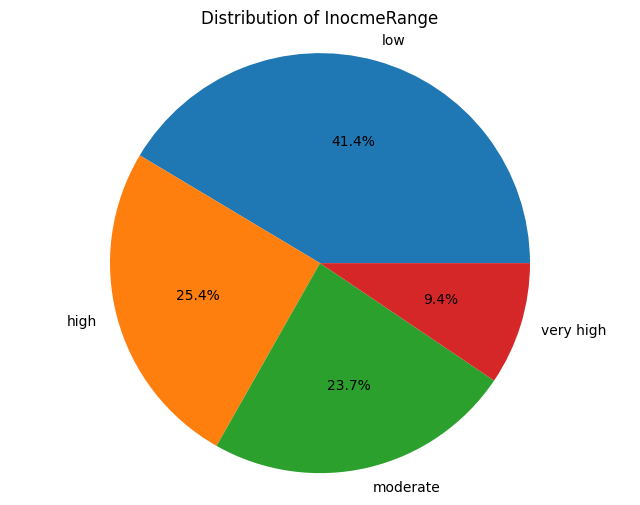

In [17]:
plt.figure(figsize=(8,6))
plt.title('Distribution of InocmeRange')
plt.pie(income.total,labels=income.income_levels,autopct='%.1f%%')
plt.axis('equal')
plt.show()

In [18]:
dependent =df['dependency'].value_counts().reset_index()
dependent.rename(columns={'count':'total'},inplace=True)
dependent

,dependency,total
0,moderate,1435
1,high,1425
2,low,1409


In [19]:
employment=df['self_employed'].value_counts().reset_index()
employment.rename(columns={'count':'no_of_applicant'},inplace=True)
employment

,self_employed,no_of_applicant
0,Yes,2150
1,No,2119


In [20]:
df['loan_status'].value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [21]:
loan=df['loan_status'].value_counts().reset_index()
loan.rename(columns={'count':'Total'},inplace=True)
loan

,loan_status,Total
0,Approved,2656
1,Rejected,1613


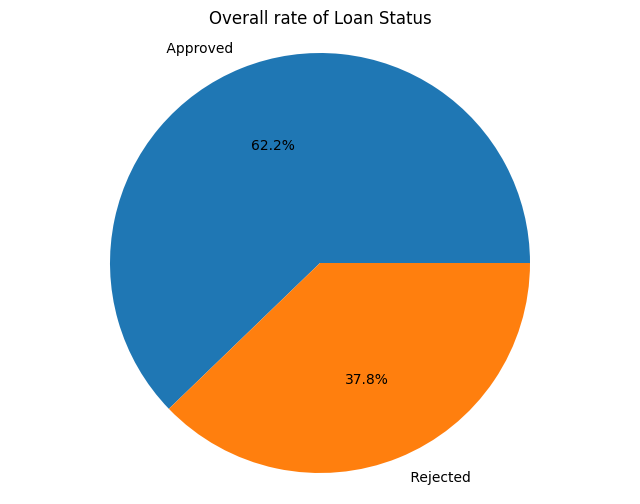

In [22]:
# plot a pie chart
plt.figure(figsize=(8,6))
plt.title('Overall rate of Loan Status')
plt.pie(loan.Total,labels=loan.loan_status,autopct='%.1f%%')
plt.axis('equal')
plt.show()

In [23]:
edu=df.groupby(['education','loan_status']).size().reset_index()
edu.rename(columns={' education':'Education',0:'Total'},inplace=True)
edu

,education,loan_status,Total
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


In [24]:
pivot_table = edu.pivot_table(index='education', columns='loan_status',values='Total')
row_total = pivot_table.sum(axis=1)
percentage = pivot_table.div(row_total, axis=0) * 100
percentage

loan_status,Approved,Rejected
education,,
Graduate,62.453358,37.546642
Not Graduate,61.976471,38.023529


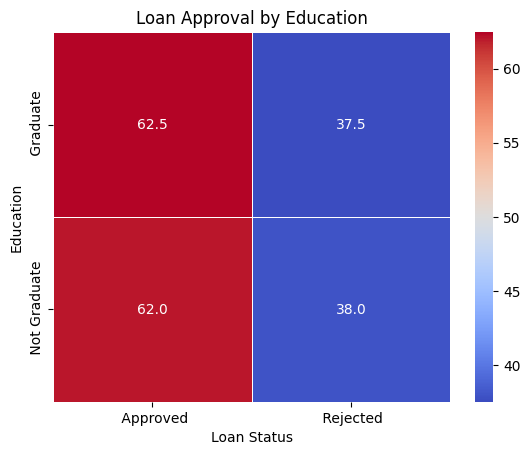

In [25]:
# create a heat map 
plt.title('Loan Approval by Education')
sns.heatmap(percentage,annot=True,fmt='.1f',cmap='coolwarm',linewidth=0.5)
plt.xlabel('Loan Status')
plt.ylabel('Education')
plt.show()

In [26]:
employment_type =df.groupby(['loan_status','self_employed']).size().reset_index()
employment_type.rename(columns={'loan_status':'LoanStatus','self_employed':'SelfEmployed',0:'Total'},inplace=True)
employment_type

,LoanStatus,SelfEmployed,Total
0,Approved,No,1318
1,Approved,Yes,1338
2,Rejected,No,801
3,Rejected,Yes,812


In [27]:
# create a pivot table
pivot_table =employment_type.pivot(index='LoanStatus',columns='SelfEmployed',values='Total')
row_total =pivot_table.sum(axis=1)
percentage =pivot_table.div(row_total,axis=0)*100
percentage

SelfEmployed,No,Yes
LoanStatus,,
Approved,49.623494,50.376506
Rejected,49.659020,50.340980


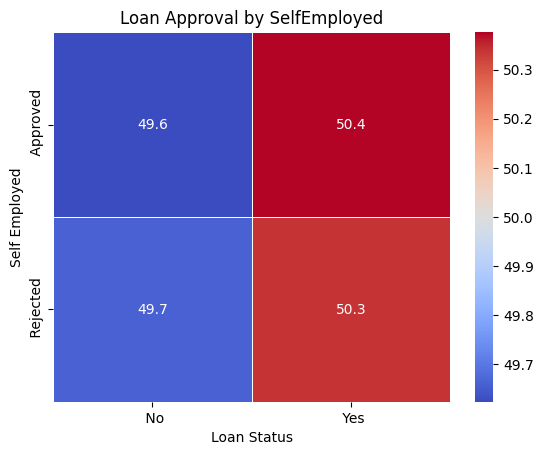

In [28]:
# create a heat map 
plt.title('Loan Approval by SelfEmployed')
sns.heatmap(percentage,annot=True,fmt='.1f',cmap='coolwarm',linewidth=0.5)
plt.xlabel('Loan Status')
plt.ylabel('Self Employed')
plt.show()

# Correlation

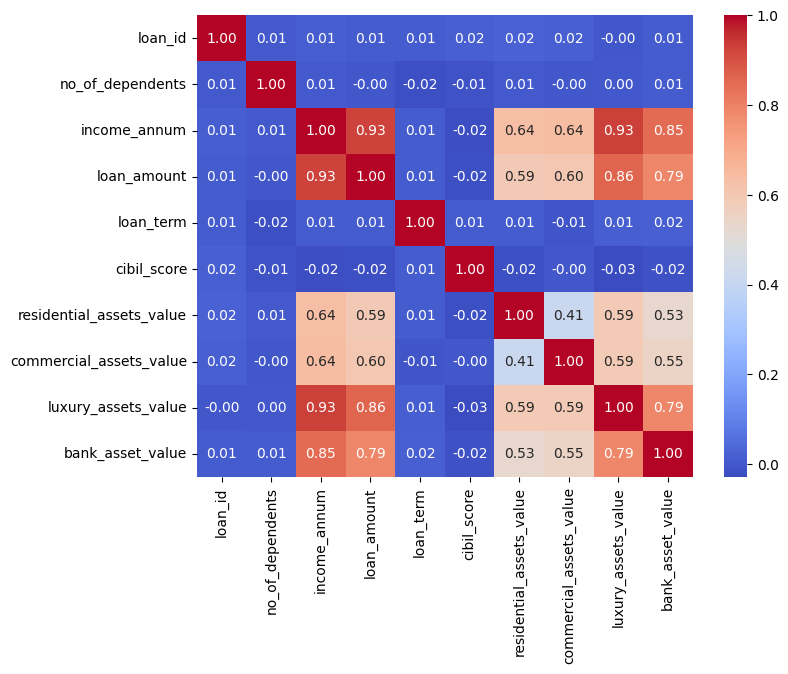

In [29]:
correlation_matrix =df.corr(numeric_only =True)
correlation_matrix

# create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [30]:
assets =['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value','income_annum']
income ='income_annum'

correlation =df[assets + [income]].corr()
correlation.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,income_annum,income_annum
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.636824,0.636824
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.640328,0.640328
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.929145,0.929145
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.851093,0.851093
income_annum,0.636824,0.640328,0.929145,0.851093,1.000000,1.000000


# Asset value impact/influence on loan approval/elegiblity
## If there is a relation asset value and getting a loan approval

In [31]:
from scipy import stats
from scipy.stats import f_oneway 
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency 

In [32]:
# splitting data into two group based on loan status
approved =df[df['loan_status']=='Accepted']
rejected =df[df['loan_status']=='Rejected']

# performance a t-test
columns = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'income_annum']
df[columns].head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,income_annum
0,2400000,17600000,22700000,8000000,9600000
1,2700000,2200000,8800000,3300000,4100000
2,7100000,4500000,33300000,12800000,9100000
3,18200000,3300000,23300000,7900000,8200000
4,12400000,8200000,29400000,5000000,9800000


In [33]:
print(df['loan_status'].unique())

[' Approved' ' Rejected']


In [34]:
print(df['loan_status'].isnull().sum())

0


In [35]:
df['loan_status'].value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [36]:
# splitting data into two group based on loan status
approved =df[df['loan_status']==' Approved']
rejected =df[df['loan_status']==' Rejected']

# performance a t-test
columns = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'income_annum']

print(approved.shape,rejected.shape)

(2656, 16) (1613, 16)


In [37]:
for column in columns:
    t_stat,p_value =ttest_ind(approved[column],rejected[column],equal_var=False)
    print(f'T-Test for{column}:')
    print(f'T-Statistic: {t_stat}')
    print(f' P-value:{p_value}')

if p_value <0.05:
    print(f'The differnce in {column} between and rejected loans statistically significant')
else :
    print(f'The differnce in {column} between and rejected loans not statistically significant')

T-Test forresidential_assets_value:
T-Statistic: -0.9399394365500209
 P-value:0.34731539500224484
T-Test forcommercial_assets_value:
T-Statistic: 0.5387741456120381
 P-value:0.5900779272018966
T-Test forluxury_assets_value:
T-Statistic: -1.013970039592796
 P-value:0.3106683217824068
T-Test forbank_asset_value:
T-Statistic: -0.4448616890142232
 P-value:0.6564475917396153
T-Test forincome_annum:
T-Statistic: -0.9970165229893369
 P-value:0.31882633058964843
The differnce in income_annum between and rejected loans not statistically significant


# Using ANOVA to determine a correlation between income and asset value

## Null Hypothesis: There is no relation (significant difference) between assets value and income.
## Alternative Hypothesis :There exist a relationship (significant difference) between asset value and income.

In [38]:
from scipy.stats import f_oneway

# Extracting values in columns
residential_assets = df['residential_assets_value']
commercial_assets = df['commercial_assets_value']
luxury_assets = df['luxury_assets_value']
bank_assets = df['bank_asset_value']
income = df['income_annum']

# Perform ANOVA
f_statistic, p_value = f_oneway(residential_assets, commercial_assets, luxury_assets, bank_assets, income)

print('The F-statistic:', f_statistic)
print('The p-value is:', p_value)

# Interpretation of the results
if p_value > 0.05:
    print('There is a significant influence of asset values on income per annum.')
else:
    print('There is no significant influence of asset values on income per annum.')

The F-statistic: 2518.654468935116
The p-value is: 0.0
There is no significant influence of asset values on income per annum.


# Correlation between income and Loan amount

In [39]:
income =df['income_annum']
loan =df['loan_amount']

#perform an independent t-test
t_stat,p_value =ttest_ind(income,loan,equal_var=True)

print('The T-Statistic:',t_stat)
print('The p value is:',p_value)
if p_value <0.5:
    print('There is a statistical significant difference in loan amount and income per annum')
else:
    print('There is no statistical significant difference in loan amount and income per annum')

The T-Statistic: -69.51489699866843
The p value is: 0.0
There is a statistical significant difference in loan amount and income per annum


# Chi-Square Test: Determine correlation between loan status and number of dependents

In [40]:
# Creating a contingency table
contingency_table = pd.crosstab(df['loan_status'], df['dependency'])

# Perform chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print('Chi-Square test statistic:', chi2)
print('The P-value is:', p_value)
print('The degrees of freedom (dof) is:', dof)

# Set the significance level
alpha = 0.05

if p_value < alpha:
    print('There is a statistically significant relationship between loan status and the number of dependents.')
else:
    print('There is no statistically significant relationship between loan status and the number of dependents.')


Chi-Square test statistic: 1.1296798036848839
The P-value is: 0.5684511474541935
The degrees of freedom (dof) is: 2
There is no statistically significant relationship between loan status and the number of dependents.


# Logistic Regression

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [44]:
# Example: Using LabelEncoder for binary categorical columns
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])

# If there are other categorical variables with more than two categories, use pd.get_dummies()
df = pd.get_dummies(df, columns=['cibil_range', 'income_range', 'dependency'], drop_first=True)

In [45]:
scaler = StandardScaler()
numerical_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                      'residential_assets_value', 'commercial_assets_value',
                      'luxury_assets_value', 'bank_asset_value']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [46]:
X = df.drop(columns=['loan_id', 'loan_status'])
y = df['loan_status']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [49]:
y_pred = model.predict(X_test)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

In [50]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

Accuracy Score: 0.9754098360655737


## The logistic regression model achieved an accuracy of 0.97 on the test set, indicating high performance.


In [51]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Precision, Recall, and F1-Score
precision = class_report.split()[-4]
recall = class_report.split()[-3]
f1_score = class_report.split()[-2]

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

Confusion Matrix:
 [[519  17]
 [  4 314]]
Classification Report:
               precision    recall  f1-score   support

    Approved       0.99      0.97      0.98       536
    Rejected       0.95      0.99      0.97       318

    accuracy                           0.98       854
   macro avg       0.97      0.98      0.97       854
weighted avg       0.98      0.98      0.98       854

Precision: 0.98
Recall: 0.98
F1 Score: 0.98


Interpretation: The model is very precise, particularly in predicting loan approvals, meaning it has a low false positive rate.